# 라이브러리 임포트

In [2]:
# 파일 경로
from glob import glob
# api 요청
import requests
import json
# 데이터 자료형 및 분석도구
import pandas as pd
import numpy as np
from scipy import stats
# PUBG 분석 도구
from chicken_dinner.pubgapi import PUBG
from chicken_dinner.constants import COLORS
from chicken_dinner.constants import map_dimensions
# 시각화
import matplotlib as mlp
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import patheffects
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [31]:
# pandas option
pd.options.display.max_columns = None

In [34]:
# seaborn 테마
sns.set_theme(style="white")

In [4]:
csv_list = glob('dataset/*.csv')
csv_list

['dataset/B_group_hitrate_damage.csv',
 'dataset/all_hit_rate_2022.csv',
 'dataset/get_item.csv',
 'dataset/df_result_2022.csv',
 'dataset/df_result_2023.csv',
 'dataset/df_mat.csv',
 'dataset/all_hit_rate_2022_GF.csv',
 'dataset/agroup_result.csv',
 'dataset/cgroup_damage_rate.csv',
 'dataset/result.csv',
 'dataset/df_match_2022.csv',
 'dataset/df_result_2022_GF.csv',
 'dataset/all_hit_rate.csv',
 'dataset/NAVIPeRoGBLLGCESEXO_gs.csv']

In [30]:
df_all = df_all.sort_values(by=['match', 'attacker_name'])
df_all

,match,attacker_name,hit_rate,damage,team
240,1,17_Lilghost,0.000000,0.000000,17
241,1,17_SuJiu,26.470588,139.302788,17
242,1,17_Xbei,3.875969,10.800000,17
243,1,17_xwudd,6.666667,24.000000,17
4,1,4AM_CRAZY112,7.246377,261.235685,4AM
...,...,...,...,...,...
267,12,TWIS_spyrro,17.021277,94.800000,TWIS
272,12,Tian_77owo,12.500000,28.000103,Tian
273,12,Tian_LinShu,2.777778,11.839683,Tian
274,12,Tian_LongSkr,2.597403,82.799997,Tian


# 1.23GS(그룹스테이지) 적중률, 데미지

### 데이터 불러오기

In [9]:
#
df_hit_23gs = pd.read_csv('dataset/all_hit_rate.csv')
df_hit_23gs

,match,attacker_name,hit_rate,damage,team
0,1,17_Lilghost,0.000000,0.000000,17
1,1,17_SuJiu,26.470588,139.302788,17
2,1,17_Xbei,3.875969,10.800000,17
3,1,17_xwudd,6.666667,24.000000,17
4,1,4AM_CRAZY112,7.246377,261.235685,4AM
...,...,...,...,...,...
1147,12,TWIS_spyrro,17.021277,94.800000,TWIS
1148,12,Tian_77owo,12.500000,28.000103,Tian
1149,12,Tian_LinShu,2.777778,11.839683,Tian
1150,12,Tian_LongSkr,2.597403,82.799997,Tian


In [10]:
# 기술통계로 이상치 확인해보기
df_hit_23gs.describe()

,match,hit_rate,damage
count,1152.000000,1151.000000,1151.000000
mean,6.500000,11.588047,182.409463
std,3.453552,21.465094,169.178157
min,1.000000,0.000000,0.000000
25%,3.750000,3.883495,54.188901
50%,6.500000,8.571429,138.198610
75%,9.250000,13.594362,267.570078
max,12.000000,450.000000,977.871228


### 시각화해서 인사이트 얻기

* 적중률, 데미지 plot 
* 적중률이 100이 넘는... 경우가 있다

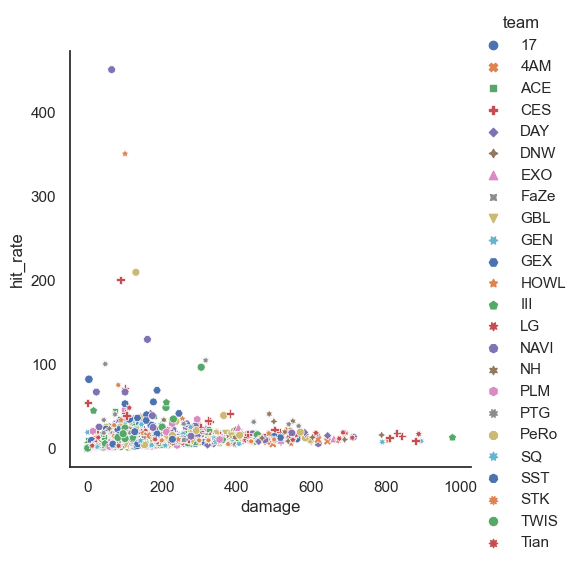

In [35]:
#plt.figure(figsize=(20, 8))
sns.relplot(data=df_hit_23gs, x='damage', y='hit_rate', hue='team',
            style="team", palette="deep");

<Axes: xlabel='team', ylabel='hit_rate'>

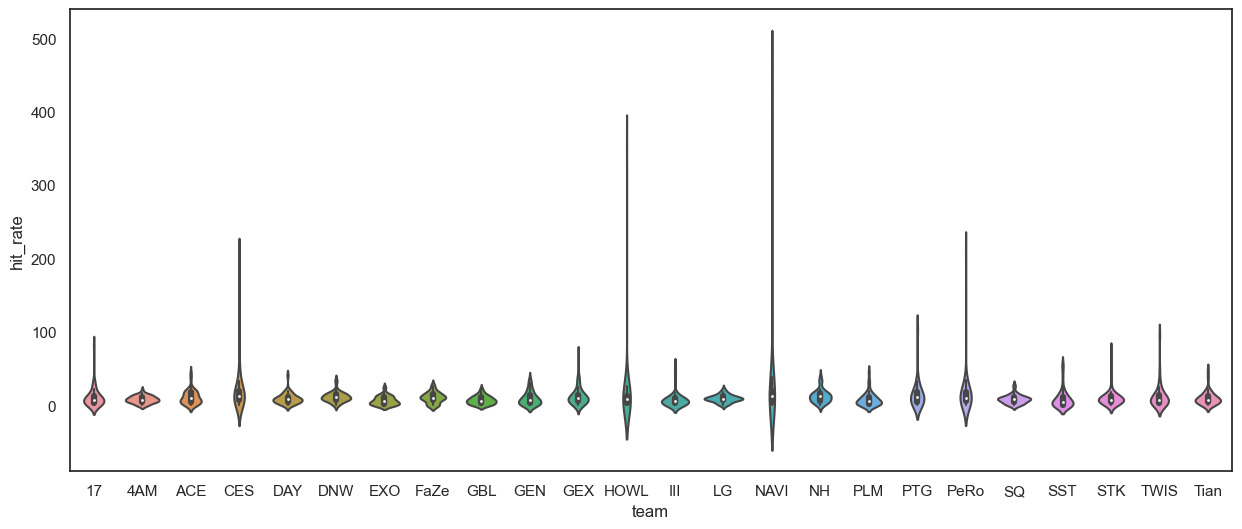

In [39]:
# 팀별 적중률 이상치 확인해보기
plt.figure(figsize=(15, 6))
sns.violinplot(data=df_hit_23gs, x='team', y='hit_rate')

In [40]:
# 100 초과인 경우 확인하기
df_hit_23gs[df_hit_23gs.hit_rate > 100]

,match,attacker_name,hit_rate,damage,team
170,2,PeRo_Cui71,209.090909,129.039996,PeRo
538,6,NAVI_ubah,129.166667,159.999989,NAVI
539,6,NAVI_xmpl,450.000000,64.000002,NAVI
550,6,PTG_Hikari,104.285714,316.000005,PTG
972,11,CES_HaiSaki,200.000000,87.679934,CES
1007,11,HOWL_scof1eld,350.000000,100.000000,HOWL


* 적중률이 100보다 작은 경우로 다시 보기.

In [42]:
# 기술통계
df_hit_23gs[df_hit_23gs.hit_rate <= 100].describe()

,match,hit_rate,damage
count,1145.000000,1145.000000,1145.000000
mean,6.493450,10.388907,182.617093
std,3.453766,10.434806,169.489680
min,1.000000,0.000000,0.000000
25%,3.000000,3.875969,53.583790
50%,7.000000,8.500000,139.302788
75%,9.000000,13.533835,267.724243
max,12.000000,100.000000,977.871228


In [43]:
df_hit_23gs_af = df_hit_23gs[df_hit_23gs.hit_rate <= 100]
df_hit_23gs_af

,match,attacker_name,hit_rate,damage,team
0,1,17_Lilghost,0.000000,0.000000,17
1,1,17_SuJiu,26.470588,139.302788,17
2,1,17_Xbei,3.875969,10.800000,17
3,1,17_xwudd,6.666667,24.000000,17
4,1,4AM_CRAZY112,7.246377,261.235685,4AM
...,...,...,...,...,...
1147,12,TWIS_spyrro,17.021277,94.800000,TWIS
1148,12,Tian_77owo,12.500000,28.000103,Tian
1149,12,Tian_LinShu,2.777778,11.839683,Tian
1150,12,Tian_LongSkr,2.597403,82.799997,Tian


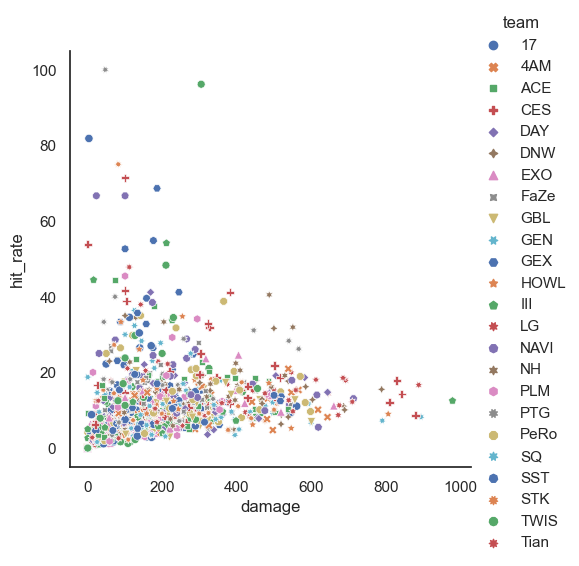

In [44]:
sns.relplot(data=df_hit_23gs_af, x='damage', y='hit_rate', hue='team',
            style="team", palette="deep");

In [46]:
df_mean_player = df_under_100.groupby(by='attacker_name').agg({'hit_rate' : 'mean', 'damage' : 'mean'}).reset_index()
df_mean_player

,attacker_name,hit_rate,damage
0,17_Lilghost,8.661669,210.293999
1,17_SuJiu,10.809577,108.984009
2,17_Xbei,9.871558,136.203165
3,17_xwudd,13.776167,70.324183
4,4AM_CRAZY112,6.786302,196.102341
...,...,...,...
94,TWIS_spyrro,9.719537,148.887956
95,Tian_77owo,13.169133,162.023664
96,Tian_LinShu,8.588537,125.880982
97,Tian_LongSkr,7.326140,144.017252


In [50]:
px.scatter(df_mean_player, x='damage', y='hit_rate', color='attacker_name')

# 2.22PGC(그룹스테이지) 적중률, 데미지

### 데이터 불러오기

In [45]:
csv_list

['dataset/B_group_hitrate_damage.csv',
 'dataset/all_hit_rate_2022.csv',
 'dataset/get_item.csv',
 'dataset/df_result_2022.csv',
 'dataset/df_result_2023.csv',
 'dataset/df_mat.csv',
 'dataset/all_hit_rate_2022_GF.csv',
 'dataset/agroup_result.csv',
 'dataset/cgroup_damage_rate.csv',
 'dataset/result.csv',
 'dataset/df_match_2022.csv',
 'dataset/df_result_2022_GF.csv',
 'dataset/all_hit_rate.csv',
 'dataset/NAVIPeRoGBLLGCESEXO_gs.csv']

In [46]:
# 그룹A 16개, 그룹B 16개
# 3일 * 5매치 * 2그룹 = 30매치
df_hit_22gs = pd.read_csv('dataset/all_hit_rate_2022.csv')
df_hit_22gs

,match,attacker_name,hit_rate,damage,team
0,1,NH_MMing,6.367925,481.099311,NH
1,1,NH_Nannnnn,3.804348,198.228178,NH
2,1,NH_HSmm,11.055276,509.016048,NH
3,1,NH_ZpYan1,5.128205,246.940110,NH
4,1,OP_jeemzz,10.382514,433.023260,OP
...,...,...,...,...,...
1915,30,USG_Kein,12.121212,140.889999,USG
1916,30,TMA_CRAZY112,30.434783,125.110003,TMA
1917,30,TMA_YUPPIE,13.333333,68.138182,TMA
1918,30,TMA_LuLualways,10.000000,54.339748,TMA


In [47]:
# 기술통계로 이상치 확인해보기
df_hit_22gs.describe()

,match,hit_rate,damage
count,1920.000000,1920.000000,1920.000000
mean,15.500000,10.784115,187.969796
std,8.657696,11.216729,171.361525
min,1.000000,0.000000,0.000000
25%,8.000000,4.561021,57.566598
50%,15.500000,8.874824,148.323600
75%,23.000000,14.285714,270.565272
max,30.000000,250.000000,1187.916014


### 시각화, 인사이트

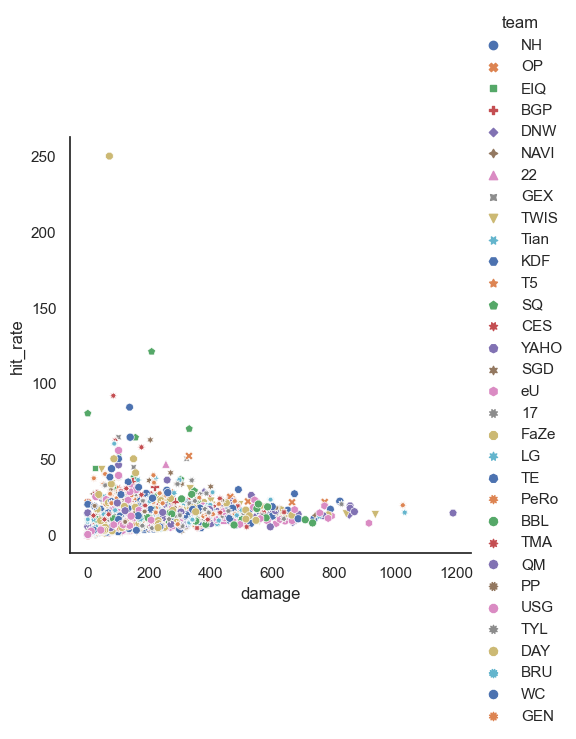

In [48]:
sns.relplot(data=df_hit_22gs, x='damage', y='hit_rate', hue='team',
            style="team", palette="deep");

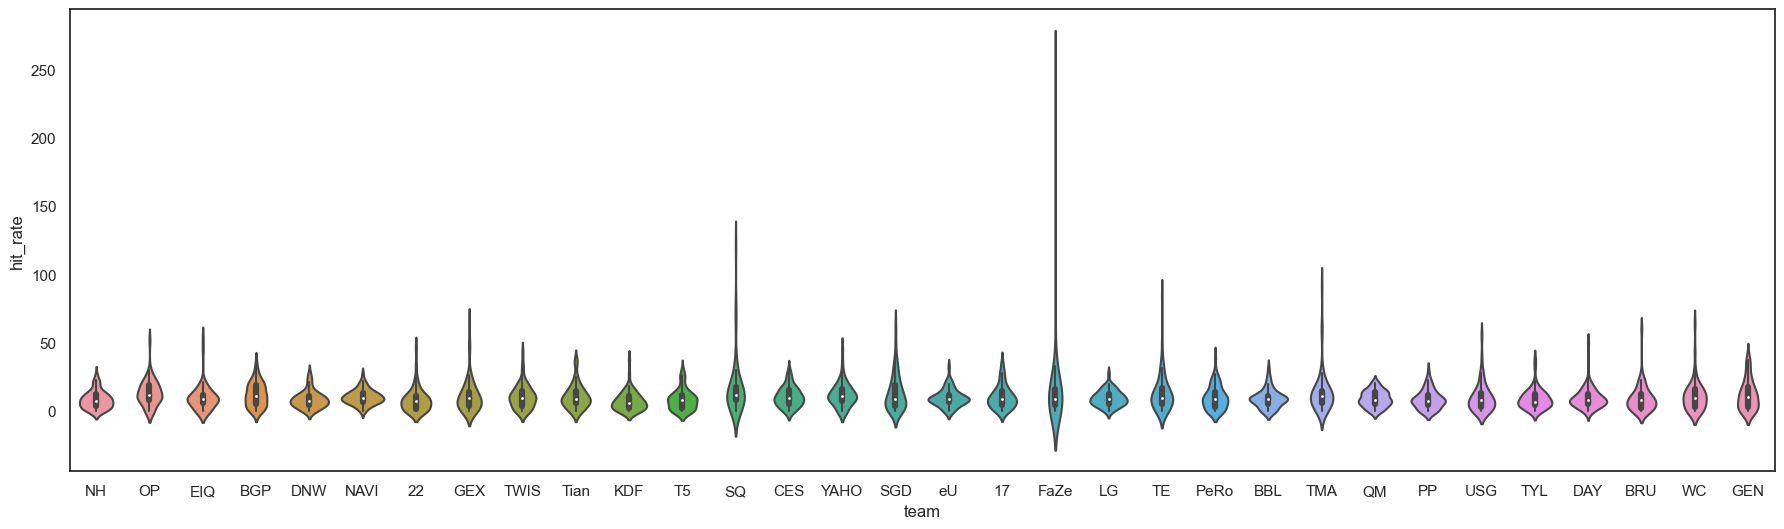

In [50]:
# 팀별 적중률 이상치 확인해보기
plt.figure(figsize=(22, 6))
sns.violinplot(data=df_hit_22gs, x='team', y='hit_rate');

In [51]:
# 100 초과인 경우 확인하기
df_hit_22gs[df_hit_22gs.hit_rate > 100]

,match,attacker_name,hit_rate,damage,team
125,2,SQ_hwinn,120.833333,207.566387,SQ
1598,25,FaZe_Fexx,250.000000,70.200000,FaZe


In [52]:
df_hit_22gs_af = df_hit_22gs[df_hit_22gs.hit_rate <= 100]
df_hit_22gs_af

,match,attacker_name,hit_rate,damage,team
0,1,NH_MMing,6.367925,481.099311,NH
1,1,NH_Nannnnn,3.804348,198.228178,NH
2,1,NH_HSmm,11.055276,509.016048,NH
3,1,NH_ZpYan1,5.128205,246.940110,NH
4,1,OP_jeemzz,10.382514,433.023260,OP
...,...,...,...,...,...
1915,30,USG_Kein,12.121212,140.889999,USG
1916,30,TMA_CRAZY112,30.434783,125.110003,TMA
1917,30,TMA_YUPPIE,13.333333,68.138182,TMA
1918,30,TMA_LuLualways,10.000000,54.339748,TMA


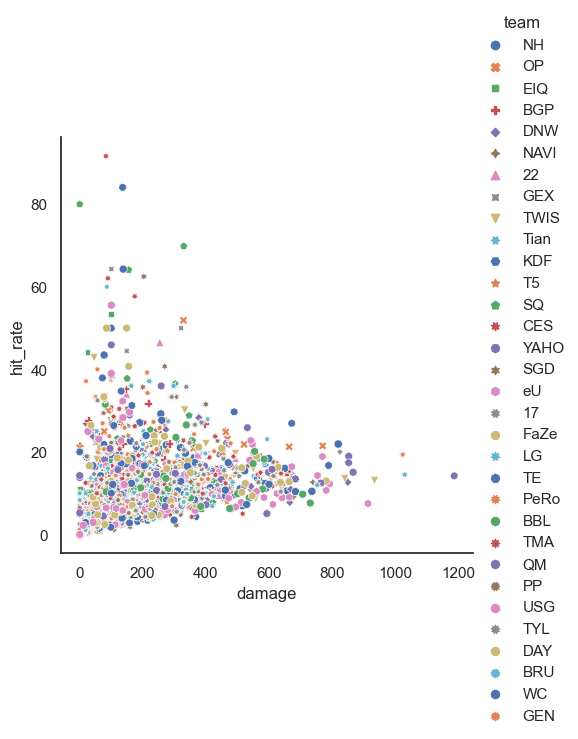

In [53]:
sns.relplot(data=df_hit_22gs_af, x='damage', y='hit_rate', hue='team',
            style="team", palette="deep");

# 3.22PGC(그랜드파이널) 적중률, 데미지

## 데이터 불러오기

In [54]:
csv_list

['dataset/B_group_hitrate_damage.csv',
 'dataset/all_hit_rate_2022.csv',
 'dataset/get_item.csv',
 'dataset/df_result_2022.csv',
 'dataset/df_result_2023.csv',
 'dataset/df_mat.csv',
 'dataset/all_hit_rate_2022_GF.csv',
 'dataset/agroup_result.csv',
 'dataset/cgroup_damage_rate.csv',
 'dataset/result.csv',
 'dataset/df_match_2022.csv',
 'dataset/df_result_2022_GF.csv',
 'dataset/all_hit_rate.csv',
 'dataset/NAVIPeRoGBLLGCESEXO_gs.csv']

In [55]:
# 결승전 16팀
# 4일 * 5매치 = 20매치
df_hit_22gf = pd.read_csv('dataset/all_hit_rate_2022_GF.csv')
df_hit_22gf

,match,attacker_name,hit_rate,damage,team
0,1,17_shou,7.228916,303.182106,17
1,1,17_Lilghost,9.236948,685.448511,17
2,1,17_SuJiu,9.139785,355.306829,17
3,1,17_xwudd,6.976744,221.690997,17
4,1,EIQ_ivas,10.843373,156.469128,EIQ
...,...,...,...,...,...
1275,20,DNW_seoul,18.840580,59.352167,DNW
1276,20,KDF_LashK,0.000000,0.000000,KDF
1277,20,KDF_EEND,0.000000,0.000000,KDF
1278,20,KDF_Akad,6.250000,47.879999,KDF


In [60]:
df_hit_22gf.team.unique()

array(['17', 'EIQ', 'eU', 'FaZe', 'OP', 'NAVI', 'QM', 'YAHO', 'DAY',
       'KDF', 'TWIS', 'TE', 'WC', 'CES', 'TMA', 'DNW'], dtype=object)

In [56]:
# 기술통계로 이상치 확인해보기
df_hit_22gf.describe()

,match,hit_rate,damage
count,1280.000000,1280.000000,1280.000000
mean,10.500000,9.790765,193.939140
std,5.768535,8.451481,177.420750
min,1.000000,0.000000,0.000000
25%,5.750000,4.761905,55.183169
50%,10.500000,8.695652,149.341597
75%,15.250000,13.009522,286.223279
max,20.000000,125.000000,996.541650


## 시각화, 인사이트

* 1위 : NAVI
* 2위 : 17
* 3위 : TWIS
* 4위 : eU
* 5위 : OP


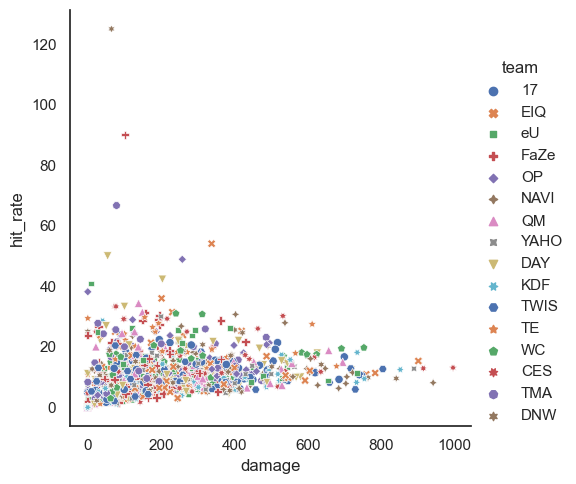

In [57]:
sns.relplot(data=df_hit_22gf, x='damage', y='hit_rate', hue='team',
            style="team", palette="deep");

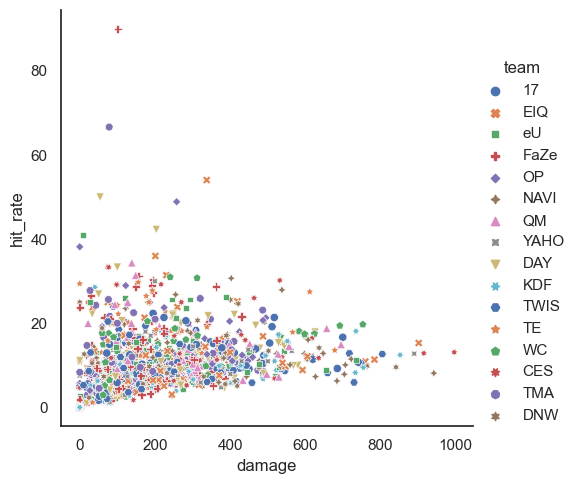

In [58]:
sns.relplot(data=df_hit_22gf[df_hit_22gf.hit_rate <= 100], x='damage', y='hit_rate', hue='team',
            style="team", palette="deep");

In [68]:
df_hit_22gf[df_hit_22gf.hit_rate > 100]

,match,attacker_name,hit_rate,damage,team
575,9,DNW_HelleN,125.0,64.552386,DNW


In [70]:
df_hit_22gf_af = df_hit_22gf[df_hit_22gf.hit_rate <= 100]
df_hit_22gf_af

,match,attacker_name,hit_rate,damage,team
0,1,17_shou,7.228916,303.182106,17
1,1,17_Lilghost,9.236948,685.448511,17
2,1,17_SuJiu,9.139785,355.306829,17
3,1,17_xwudd,6.976744,221.690997,17
4,1,EIQ_ivas,10.843373,156.469128,EIQ
...,...,...,...,...,...
1275,20,DNW_seoul,18.840580,59.352167,DNW
1276,20,KDF_LashK,0.000000,0.000000,KDF
1277,20,KDF_EEND,0.000000,0.000000,KDF
1278,20,KDF_Akad,6.250000,47.879999,KDF


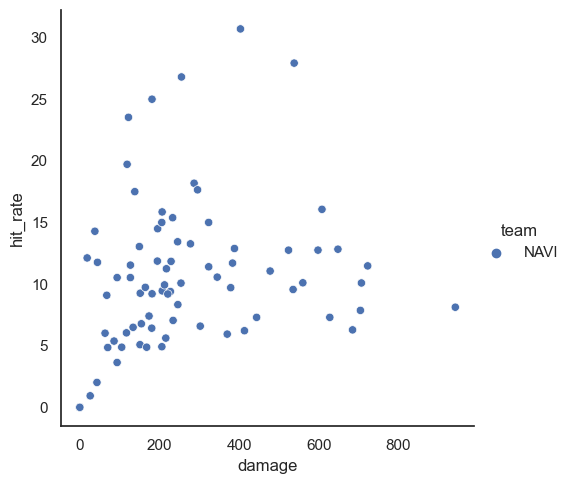

In [73]:
sns.relplot(data= df_hit_22gf_af[df_hit_22gf_af.team == 'NAVI'], 
            x='damage', y='hit_rate', 
            hue='team', style="team", palette="deep");

In [79]:
df_hit_22gf_af[df_hit_22gf_af.team == 'NAVI'].describe()

,match,hit_rate,damage
count,80.000000,80.000000,80.000000
mean,10.500000,10.360690,263.785203
std,5.802662,6.171602,206.024631
min,1.000000,0.000000,0.000000
25%,5.750000,6.387552,125.701000
50%,10.500000,9.834144,209.739863
75%,15.250000,12.844291,372.134377
max,20.000000,30.701754,942.305451


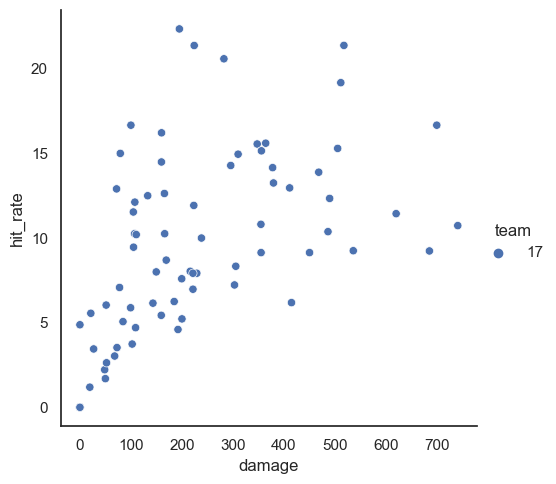

In [76]:
sns.relplot(data= df_hit_22gf_af[df_hit_22gf_af.team == '17'], 
            x='damage', y='hit_rate', 
            hue='team', style="team", palette="deep");

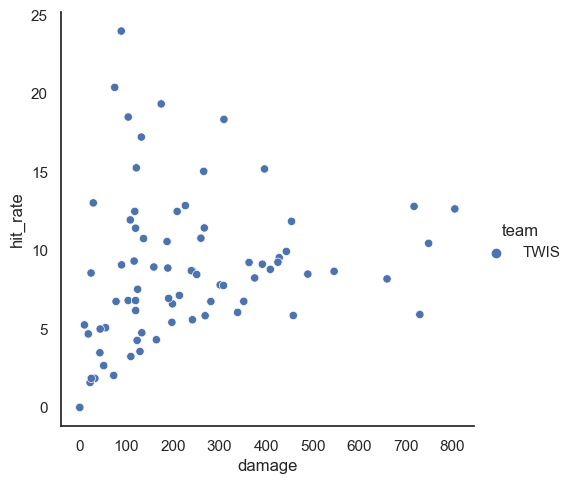

In [77]:
sns.relplot(data= df_hit_22gf_af[df_hit_22gf_af.team == 'TWIS'], 
            x='damage', y='hit_rate', 
            hue='team', style="team", palette="deep");

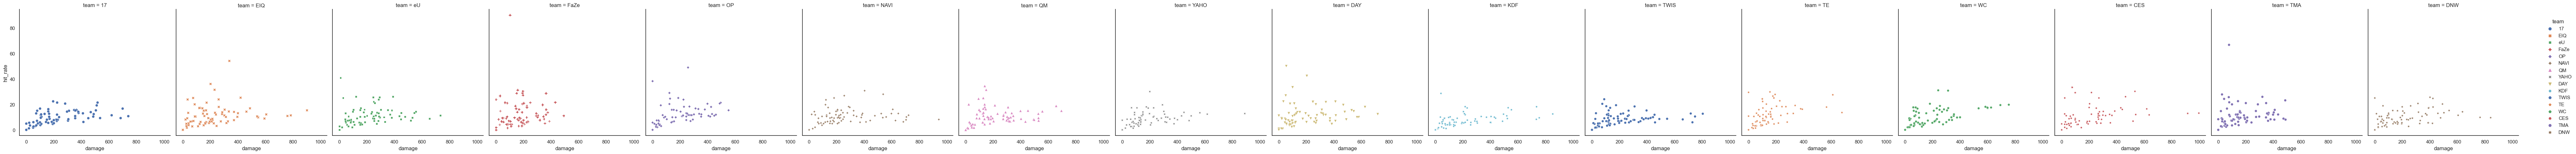

In [74]:
sns.relplot(data= df_hit_22gf_af, 
            x='damage', y='hit_rate', col='team',
            hue='team', style="team", palette="deep");

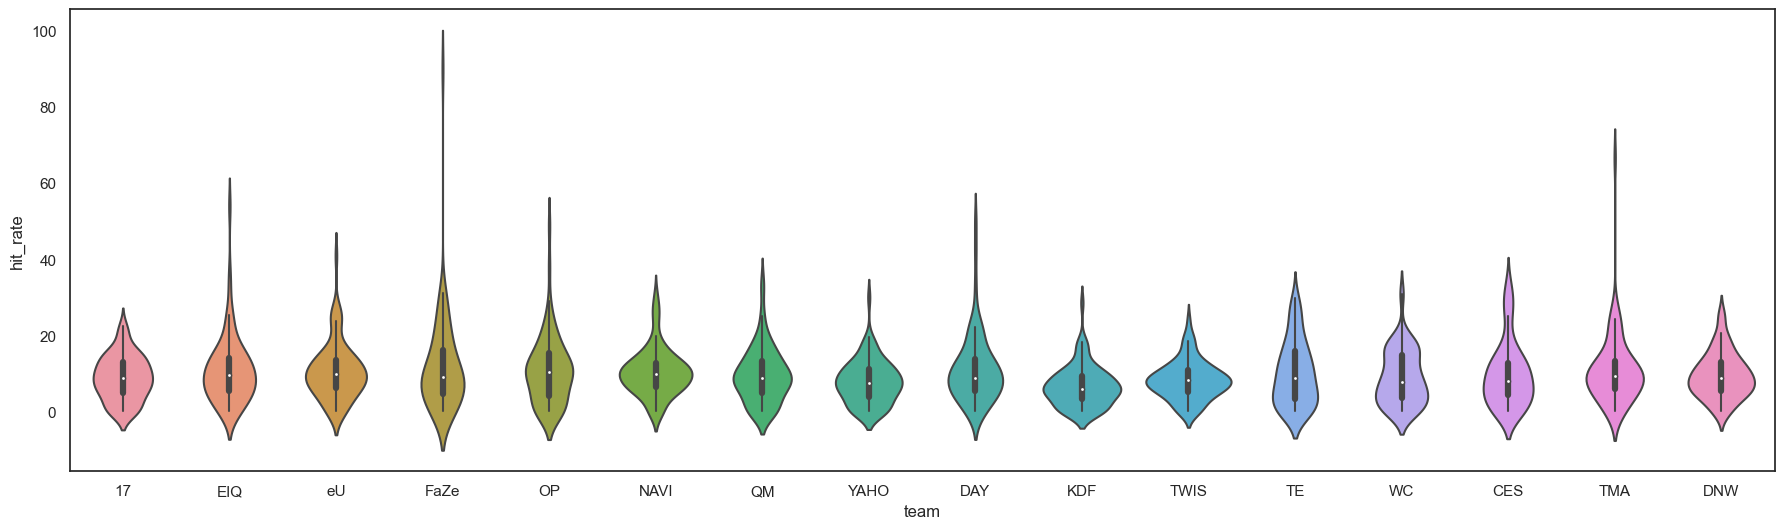

In [78]:
# 팀별 적중률 이상치 확인해보기
plt.figure(figsize=(22, 6))
sns.violinplot(data=df_hit_22gf_af, x='team', y='hit_rate');

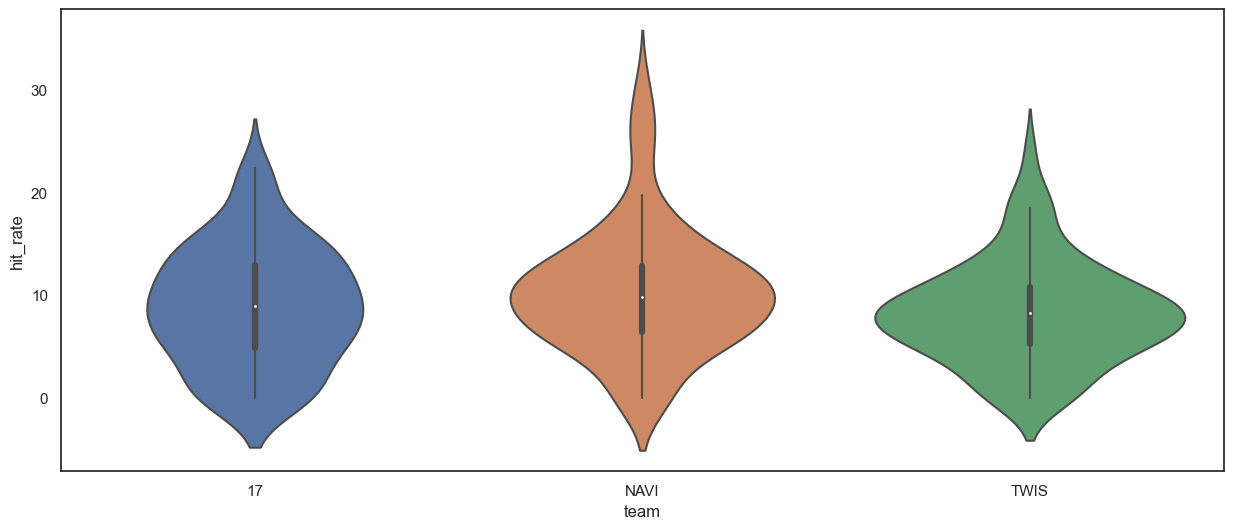

In [88]:
# 팀별 적중률 이상치 확인해보기
plt.figure(figsize=(15, 6))
sns.violinplot(data=df_hit_22gf_af[df_hit_22gf_af.team.isin(['NAVI', '17', 'TWIS'])], 
               x='team', y='hit_rate');

In [83]:
df_hit_22gf_af[df_hit_22gf_af.hit_rate < 0]

,match,attacker_name,hit_rate,damage,team


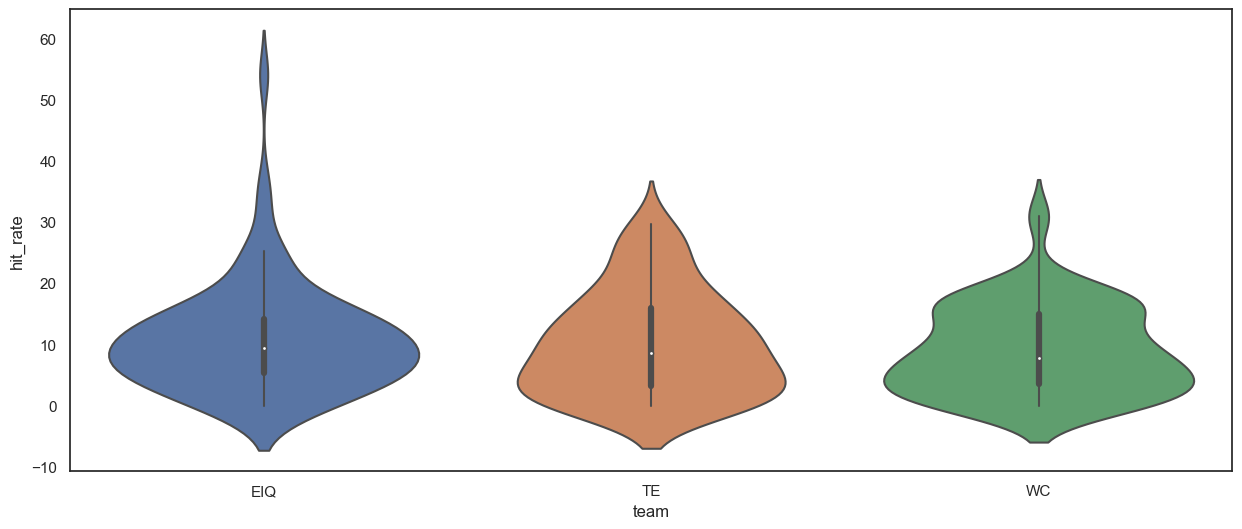

In [87]:
# 팀별 적중률 이상치 확인해보기
plt.figure(figsize=(15, 6))
sns.violinplot(data=df_hit_22gf_af[df_hit_22gf_af.team.isin(['TE', 'EIQ', 'WC'])], 
               x='team', y='hit_rate');

* 상위권 팀의 적중률이 편차가 크지 않고, 가운데에 몰리는 경향이 있는 거 같다 (?)

* 데미지로 바이올린 플롯 그려보기

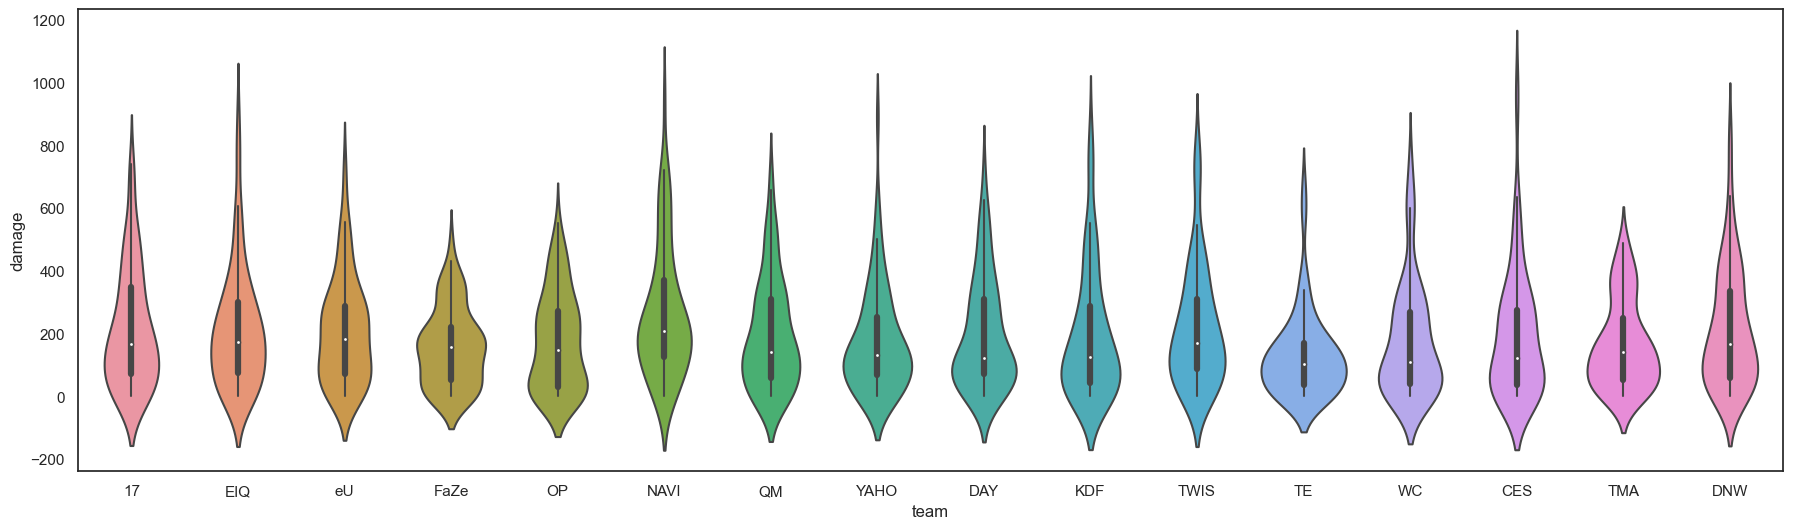

In [84]:
# 팀별 데미지 이상치 확인해보기
plt.figure(figsize=(22, 6))
sns.violinplot(data=df_hit_22gf_af, x='team', y='damage');

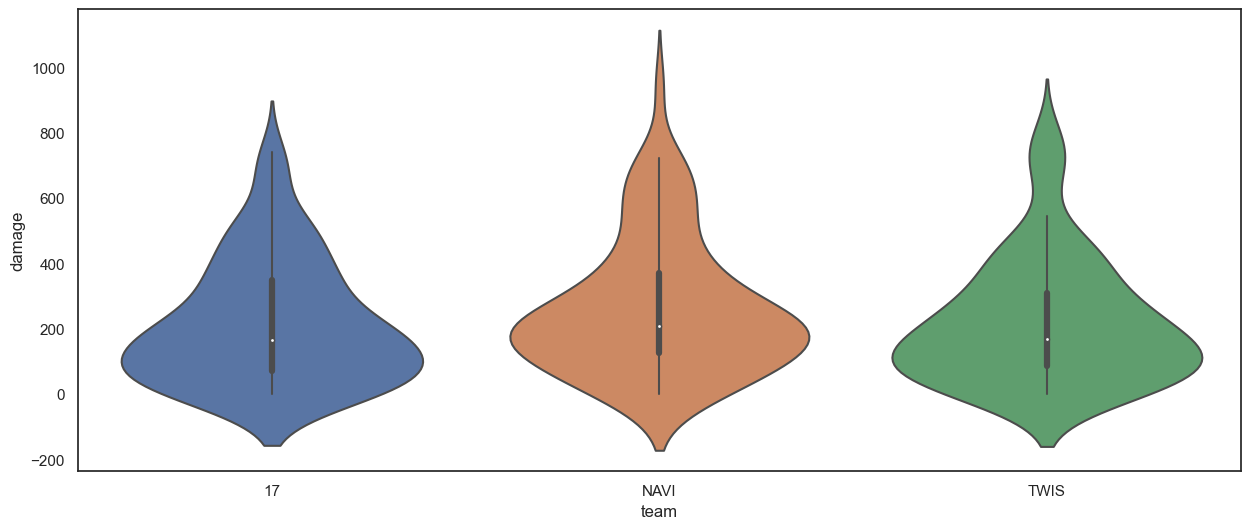

In [86]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=df_hit_22gf_af[df_hit_22gf_af.team.isin(['NAVI', '17', 'TWIS'])], 
               x='team', y='damage');

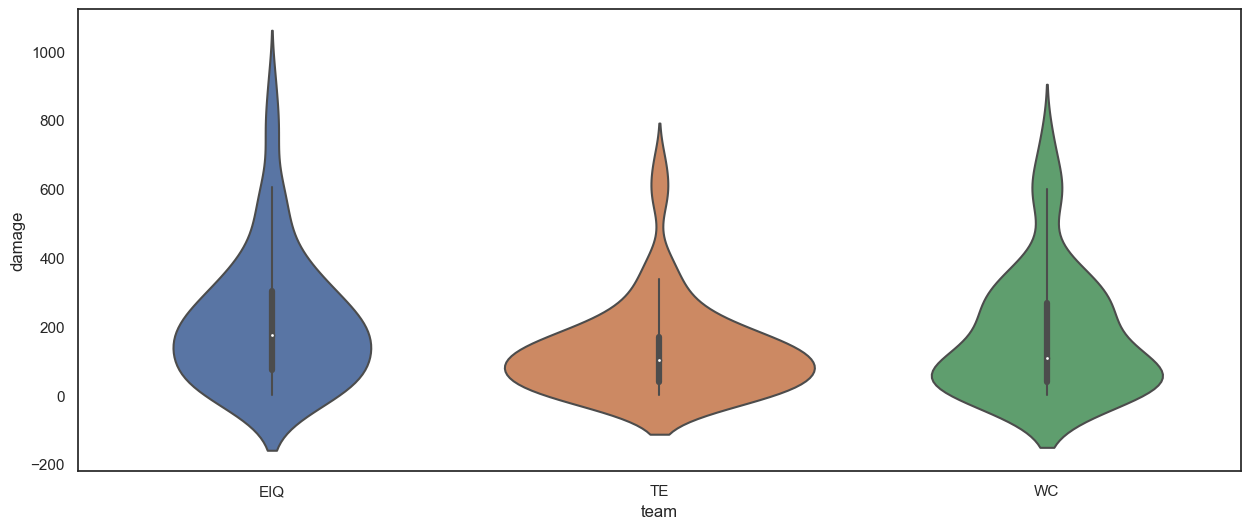

In [89]:
plt.figure(figsize=(15, 6))
sns.violinplot(data=df_hit_22gf_af[df_hit_22gf_af.team.isin(['TE', 'EIQ', 'WC'])], 
               x='team', y='damage');